This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import estimate

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

## Perpetual Youth Model Without Return Preference Heterogeneity

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "lognormal"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = False

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = True

Beginning an estimation with the specification name PYLognrmrratePointIndLiquid...
get_KY_ratio_difference tried center = 0.99 and got -2.262299752874752
get_KY_ratio_difference tried center = 1.05 and got 10.12381441446399
get_KY_ratio_difference tried center = 1.0009588837417966 and got -1.951043160209393
get_KY_ratio_difference tried center = 1.0295724111207696 and got 4.12512023627335
get_KY_ratio_difference tried center = 1.0101466266050851 and got -1.3638235132115384
get_KY_ratio_difference tried center = 1.0203152892846863 and got 1.9321279281044976
get_KY_ratio_difference tried center = 1.0143542921327118 and got -0.04224294808228879
get_KY_ratio_difference tried center = 1.0144858182561194 and got 0.025993542662688718
get_KY_ratio_difference tried center = 1.01443571559312 and got 0.00012294541531687742
get_KY_ratio_difference tried center = 1.0144352155931196 and got -0.0001359698586360647
Estimate is center=1.01443571559312, spread=0.0, took 34.964274168014526 seconds.
Runni

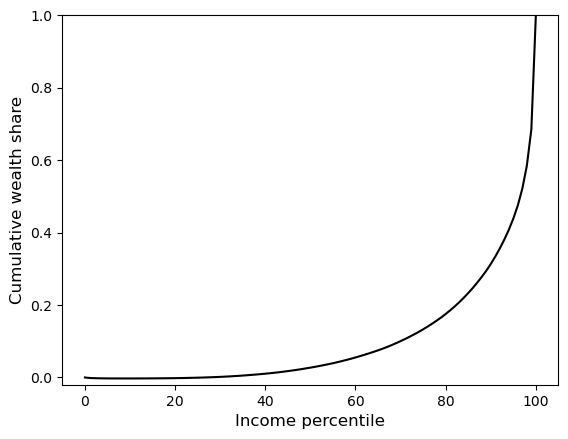

Estimate is center=1.01443571559312, spread=0.0
Lorenz distance is 51.543939061836774
Average MPC for all consumers is 0.108
Average MPC in the top percentile of W/Y is 0.068
Average MPC in the top decile of W/Y is 0.070
Average MPC in the top quintile of W/Y is 0.071
Average MPC in the second quintile of W/Y is 0.072
Average MPC in the middle quintile of W/Y is 0.074
Average MPC in the fourth quintile of W/Y is 0.082
Average MPC in the bottom quintile of W/Y is 0.243
Average MPC in the top percentile of y is 0.079
Average MPC in the top decile of y is 0.084
Average MPC in the top quintile of y is 0.093
Average MPC in the second quintile of y is 0.132
Average MPC in the middle quintile of y is 0.132
Average MPC in the fourth quintile of y is 0.087
Average MPC in the bottom quintile of y is 0.099
Average MPC for the employed is 0.105
Average MPC for the unemployed is 0.151
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
71.352% are in the bottom wealth 

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}


EstimationEconomy = estimate(options, parameters)

In [5]:
MyGuys = EstimationEconomy.agents[0]
MyGuys.check_conditions()
print(MyGuys.bilt["conditions_report"])

print(MyGuys.Rfree)

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01444 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.99803 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.99803 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98383 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.99803 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00129 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99180 : The Mortality-Adjusted Growth Patien

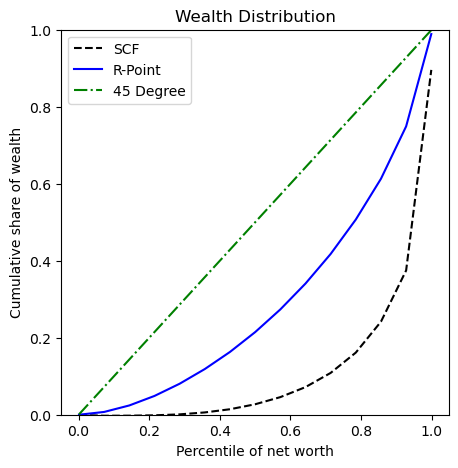

In [6]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Perpetual Youth Model with Return Preference Heterogeneneity


In [7]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = True  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

Beginning an estimation with the specification name PYLognrmrrateDistIndLiquid...
get_KY_ratio_difference tried center = 0.99 and got -2.2158088925710757
get_KY_ratio_difference tried center = 1.05 and got 12.857732156364378
get_KY_ratio_difference tried center = 0.998819993465547 and got -1.8304050568080263
get_KY_ratio_difference tried center = 1.021855350418249 and got 3.9628218014601377
get_KY_ratio_difference tried center = 1.006098153786755 and got -0.06424847645355358
get_KY_ratio_difference tried center = 1.0063585403699729 and got -0.0014836052458513382
get_KY_ratio_difference tried center = 1.0063646892495304 and got 5.209336264133668e-06
get_KY_ratio_difference tried center = 1.0063641892495299 and got -0.00011586764446636089
find_lorenz_distance_at_target_KY tried spread = 0.008257354213751997 and got 4.860184922169701
get_KY_ratio_difference tried center = 0.99 and got -2.0923114488404675
get_KY_ratio_difference tried center = 1.05 and got 15.272008009906745
get_KY_ratio_d

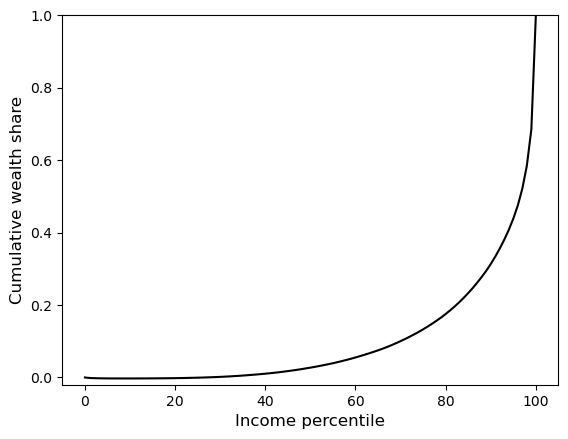

Estimate is center=1.0022946205244372, spread=0.010953539927433512
Lorenz distance is 3.6297227931505853
Average MPC for all consumers is 0.422
Average MPC in the top percentile of W/Y is 0.063
Average MPC in the top decile of W/Y is 0.066
Average MPC in the top quintile of W/Y is 0.095
Average MPC in the second quintile of W/Y is 0.292
Average MPC in the middle quintile of W/Y is 0.423
Average MPC in the fourth quintile of W/Y is 0.536
Average MPC in the bottom quintile of W/Y is 0.764
Average MPC in the top percentile of y is 0.394
Average MPC in the top decile of y is 0.384
Average MPC in the top quintile of y is 0.386
Average MPC in the second quintile of y is 0.413
Average MPC in the middle quintile of y is 0.424
Average MPC in the fourth quintile of y is 0.407
Average MPC in the bottom quintile of y is 0.480
Average MPC for the employed is 0.406
Average MPC for the unemployed is 0.644
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
48.860% are in

In [8]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": False,
}


EstimationEconomy = estimate(options, parameters)

In [9]:
MyGuys_First = EstimationEconomy.agents[0]
MyGuys_First.check_conditions()
print(MyGuys_First.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=0.98505 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.96941 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.96941 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98412 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.96941 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=0.97258 : The Risk-Modified Growth Patience Factor satisfies the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.96335 : The Mortality-Adjusted Growth Patie

In [10]:
MyGuys_Last = EstimationEconomy.agents[-1]
MyGuys_Last.check_conditions()
print(MyGuys_Last.bilt["conditions_report"])


β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01974 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=1.00320 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=1.00320 : The Absolute Patience Factor violates the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98378 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=1.00320 : The Growth Patience Factor violates the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00647 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99693 : The Mortality-Adjusted Growth Patience

In [11]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth_2 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
sim_Lorenz_points_2 = get_lorenz_shares(sim_wealth_2, percentiles=pctiles)



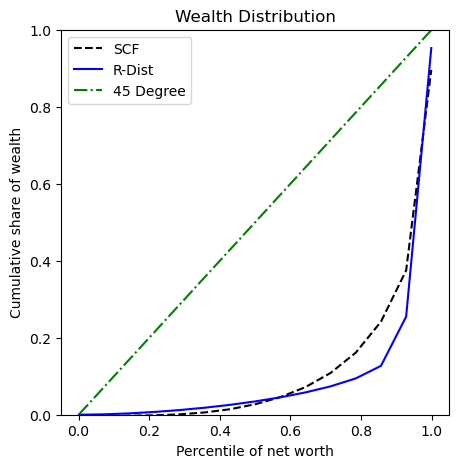

In [12]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_2, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

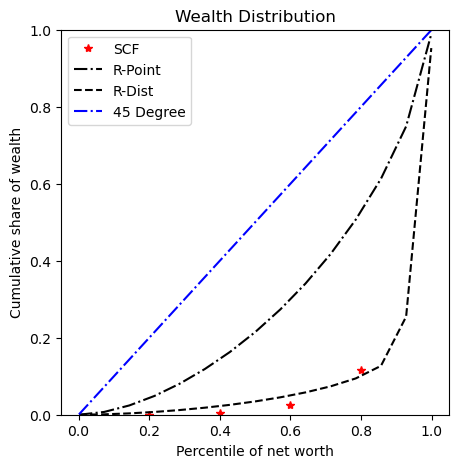

In [17]:
x = np.array([0.20, 0.40, 0.60, 0.80])
y = np.array([0.0, 0.004, 0.025, 0.117])

plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(x, y, "*r", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-.k", label="R-Point")
plt.plot(pctiles, sim_Lorenz_points_2, "--k", label="R-Dist")
plt.plot(pctiles, pctiles, "b-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

In [14]:
from code.estimation import set_targets

x = set_targets(options, parameters)
print(x)

print(EstimationEconomy.KYratioTarget)

(array([0.   , 0.004, 0.025, 0.117]), array([ 0.00000000e+00, -1.38018756e-03, -1.89001523e-03, -2.20811686e-03,
       -2.42290871e-03, -2.56463101e-03, -2.64630100e-03, -2.68362384e-03,
       -2.69376999e-03, -2.69376999e-03, -2.69143007e-03, -2.67589108e-03,
       -2.64032488e-03, -2.59047320e-03, -2.52855825e-03, -2.45482601e-03,
       -2.36618713e-03, -2.26307619e-03, -2.14138353e-03, -1.99899927e-03,
       -1.83090763e-03, -1.63378781e-03, -1.41025585e-03, -1.15409308e-03,
       -8.65103552e-04, -5.46559717e-04, -1.92434727e-04,  2.02976998e-04,
        6.37776278e-04,  1.12265297e-03,  1.66715882e-03,  2.27152700e-03,
        2.93593603e-03,  3.65811253e-03,  4.44364786e-03,  5.28884511e-03,
        6.20185121e-03,  7.17012110e-03,  8.20567571e-03,  9.29589243e-03,
        1.04425036e-02,  1.16711622e-02,  1.29999204e-02,  1.44304180e-02,
        1.59451557e-02,  1.75703457e-02,  1.92867649e-02,  2.10961381e-02,
        2.30172747e-02,  2.50366844e-02,  2.71507018e-02,  2.9

In [15]:
from code.estimation import set_targets

x = set_targets(options, parameters)
print(x)

print(EstimationEconomy.KYratioTarget)

(array([0.   , 0.004, 0.025, 0.117]), array([ 0.00000000e+00, -1.38018756e-03, -1.89001523e-03, -2.20811686e-03,
       -2.42290871e-03, -2.56463101e-03, -2.64630100e-03, -2.68362384e-03,
       -2.69376999e-03, -2.69376999e-03, -2.69143007e-03, -2.67589108e-03,
       -2.64032488e-03, -2.59047320e-03, -2.52855825e-03, -2.45482601e-03,
       -2.36618713e-03, -2.26307619e-03, -2.14138353e-03, -1.99899927e-03,
       -1.83090763e-03, -1.63378781e-03, -1.41025585e-03, -1.15409308e-03,
       -8.65103552e-04, -5.46559717e-04, -1.92434727e-04,  2.02976998e-04,
        6.37776278e-04,  1.12265297e-03,  1.66715882e-03,  2.27152700e-03,
        2.93593603e-03,  3.65811253e-03,  4.44364786e-03,  5.28884511e-03,
        6.20185121e-03,  7.17012110e-03,  8.20567571e-03,  9.29589243e-03,
        1.04425036e-02,  1.16711622e-02,  1.29999204e-02,  1.44304180e-02,
        1.59451557e-02,  1.75703457e-02,  1.92867649e-02,  2.10961381e-02,
        2.30172747e-02,  2.50366844e-02,  2.71507018e-02,  2.9

## Comparing the Estimation to Data on the Rate of Return

First, we present the graph of the estimated distribution of the rate of return across households which minimizes the Lorenz distance, given the empirical targets for wealth levels from the SCF data.

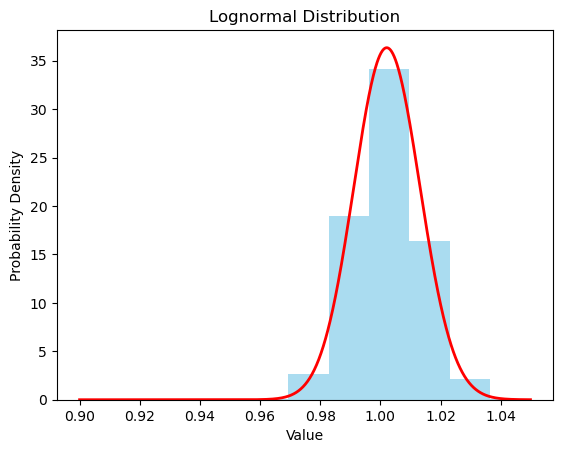

{'Mean': 1.0022946205244372,
 'Standard Deviation': 0.010979003458626797,
 'Skewness': 0.032862919785912936,
 'Kurtosis': -2.9980799882782367}

In [18]:
import re

from code.estimatedlognormalstats import EstLogNormalDist

PYLognrm_RDist = EstLogNormalDist("code/results/PYLognrmrrateDistIndLiquidResults.txt")

#print(PYLognrm_RDist.top)
#print(PYLognrm_RDist.bottom)

PYLognrm_RDist.graph()

PYLognrm_RDist.show_moments()

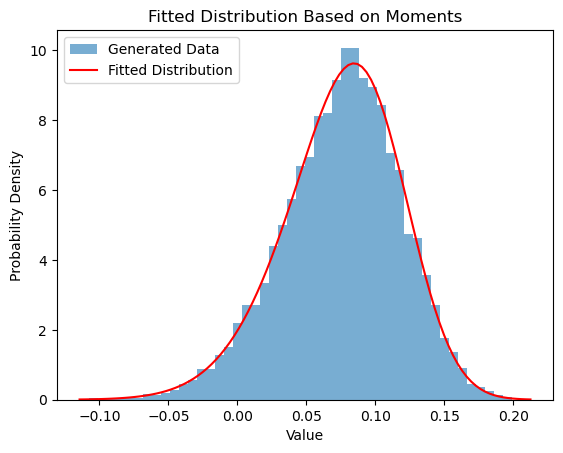

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, kurtosistest

# Given moments
mean = .0105
variance = .0596 ** 2
skewness = -1.78
kurtosis = 22.17

# Moment matching
alpha = skewness
beta = np.sqrt(kurtosis)
loc = mean - (alpha * np.sqrt(variance))
scale = np.sqrt(variance)

# Generate data from the fitted distribution
data = skewnorm.rvs(alpha, loc=loc, scale=scale, size=10000)

# Plotting the histogram and the fitted distribution
plt.hist(data, bins=50, density=True, alpha=0.6, label='Generated Data')
x_vals = np.linspace(min(data), max(data), 100)
plt.plot(x_vals, skewnorm.pdf(x_vals, alpha, loc, scale), 'r', label='Fitted Distribution')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Distribution Based on Moments')
plt.show()
